### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
application_df = pd.read_csv("https://raw.githubusercontent.com/kylejohnsonks/Neural_Network_Charity_Analysis/main/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN","NAME"],axis=1, inplace=True)

In [3]:
#List columns
column_list=application_df.columns.tolist()
column_list

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'STATUS',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS',
 'ASK_AMT',
 'IS_SUCCESSFUL']

In [4]:
#func to graph density of a column
def graph_column(col):
  col_counts=application_df[col].value_counts()
  return col_counts.plot.density()

In [5]:
#print list of values for all variables
for x in column_list: 
  print(application_df[x].value_counts())

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64
1    34294
0        5
Name: STATUS, dtype: int64
0                24388
25000

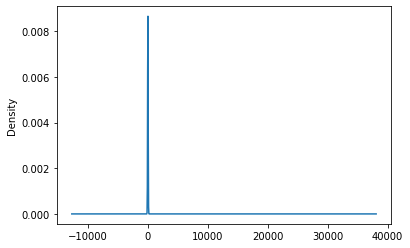

In [6]:
graph_column('ASK_AMT')

In [7]:
# APPLICATION_TYPE - bin
# AFFILIATION - bin
# CLASSIFICATION - bin
# USE_CASE is not too bad, could be binned
# ORGANIZATION, not too bad, could bin
# STATUS - drop
# INCOME_AMT - drop
# SPECIAL_CONSIDERATIONS, maybe drop, not as bad as STATUS
# ASK_AMT - drop


In [8]:
# Look at APPLICATION_TYPE value counts for binning
app_counts=application_df["APPLICATION_TYPE"].value_counts()
app_counts

# bin application values
replace_application=list(app_counts[app_counts<500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
#bin AFFILIATION
replace_AFFILIATION=["Family/Parent","National","Regional"]

# Replace in dataframe
for aff in replace_AFFILIATION:
    application_df.AFFILIATION = application_df.AFFILIATION.replace(aff,"Other")
    
# Check to make sure binning was successful
application_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
class_counts=application_df['CLASSIFICATION'].value_counts()
class_counts

# bin classification values
replace_class=list(class_counts[class_counts<1500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
# #bin USE_CASE
# replace_USECASE=["CommunityServ","Heathcare","Other"]

# # Replace in dataframe
# for uc in replace_USECASE:
#     application_df.USE_CASE = application_df.USE_CASE.replace(uc,"Other")
    
# # Check to make sure binning was successful
# application_df.USE_CASE.value_counts()

In [12]:
# # #bin ORGANIZATION
# replace_ORGANIZATION=["Co-operative","Corporation"]

# # # Replace in dataframe
# for org in replace_ORGANIZATION:
#     application_df.ORGANIZATION = application_df.ORGANIZATION.replace(org,"Other")
    
# # # Check to make sure binning was successful
# application_df.ORGANIZATION.value_counts()

In [13]:
#Drop 'STATUS',  'INCOME_AMT', 'SPECIAL_CONSIDERATIONS', 'ASK_AMT'
application_df.drop(['STATUS','INCOME_AMT','SPECIAL_CONSIDERATIONS','ASK_AMT'],axis=1,inplace=True)

In [14]:
# Generate our categorical variable lists
application_cat=application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION']

In [15]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df=pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
# Merge one-hot encoded features and drop the originals
application_df=application_df.merge(encode_df,left_index=True,right_index=True).drop(application_cat,axis=1)
application_df.head()

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
# Split our preprocessed data into our features and target arrays
y=application_df['IS_SUCCESSFUL']
X=application_df.drop('IS_SUCCESSFUL',axis=1)


# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train, y_test=train_test_split(X,y,random_state=41)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [36]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 27
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
hidden_nodes_layer4 = 30

nn = tf.keras.models.Sequential()

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="LeakyReLU"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="LeakyReLU"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 100)               2800      
                                                                 
 dense_27 (Dense)            (None, 50)                5050      
                                                                 
 dense_28 (Dense)            (None, 30)                1530      
                                                                 
 dense_29 (Dense)            (None, 30)                930       
                                                                 
 dense_30 (Dense)            (None, 1)                 31        
                                                                 
Total params: 10,341
Trainable params: 10,341
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [38]:
# Import checkpoint dependencies
from tensorflow.keras.callbacks import ModelCheckpoint
from google.colab import drive
drive.mount('/content/drive')

# Define the checkpoint path and filenames
checkpoint_path = "/content/drive/My Drive/checkpoints_opt/weights.{epoch:02d}.hdf5"

#Create callback that saves every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4020)

# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5743 - accuracy: 0.7173
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5630 - accuracy: 0.7259
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5625 - accuracy: 0.7268
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5606 - accuracy: 0.7274
Epoch 5/100
784/804 [============================>.] - ETA: 0s - loss: 0.5599 - accuracy: 0.7285
Epoch 5: saving model to /content/drive/My Drive/checkpoints_opt/weights.05.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5605 - accuracy: 0.7280
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5594 - accuracy: 0.7300
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5590 - accuracy: 0.728

In [39]:
# Export our model to HDF5 file
nn.save("/content/drive/My Drive/checkpoints_opt/AlphabetSoupCharity_Optimized.hdf5")